In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [124]:
person_name = 'tunde'
measurement_number = 1


gyroscope_leg_path = "./measurement data/Been_" + person_name + "_" + str(measurement_number) + "/Gyroscope.csv"
accelerometer_leg_path = "./measurement data/Been_" + person_name + "_" + str(measurement_number) + "/Accelerometer.csv"
gyroscope_arm_path = "./measurement data/Arm_" + person_name + "_" + str(measurement_number) + "/Gyroscope.csv"
accelerometer_arm_path = "./measurement data/Arm_" + person_name + "_" + str(measurement_number) + "/Accelerometer.csv"
workout_data_path = "./measurement data/" + person_name + "_" + str(measurement_number) + ".csv"

leg_meta_path = "./measurement data/Been_" + person_name + "_" + str(measurement_number) + "/meta/time.csv"
arm_meta_path = "./measurement data/Arm_" + person_name + "_" + str(measurement_number) + "/meta/time.csv"


meta_leg = pd.read_csv(leg_meta_path)
meta_arm = pd.read_csv(arm_meta_path)


leg_gyr_data = pd.read_csv(gyroscope_leg_path)
leg_acc_data = pd.read_csv(accelerometer_leg_path)
arm_gyr_data = pd.read_csv(gyroscope_arm_path)
arm_acc_data = pd.read_csv(accelerometer_arm_path)
workout_data = pd.read_csv(workout_data_path)

In [140]:
print(leg_gyr_data.head(), "\n")
print(leg_acc_data.head(), "\n")
print(arm_gyr_data.head(), "\n")
print(arm_acc_data.head(), "\n")

   Time (s)  X (rad/s)  Y (rad/s)  Z (rad/s)
0  0.010310   0.003889   0.001001  -0.005394
1  0.020253   0.008118  -0.004885   0.002902
2  0.030196   0.023012  -0.007201   0.006833
3  0.040139   0.033807  -0.005029   0.006771
4  0.050082   0.044389   0.004015  -0.000776 

   Time (s)  X (m/s^2)  Y (m/s^2)  Z (m/s^2)
0  0.002853  -9.153166  -3.967200   1.100062
1  0.012796  -9.103320  -3.986959   1.173560
2  0.022739  -8.999136  -4.002826   1.188978
3  0.032682  -8.885972  -4.038003   1.182541
4  0.042625  -8.768017  -4.092490   1.152453 

   Time (s)  X (rad/s)  Y (rad/s)  Z (rad/s)
0  0.006698   0.001307  -0.005154   0.004227
1  0.016751   0.000622   0.018714   0.003671
2  0.026804  -0.005434   0.039829   0.003337
3  0.036857  -0.006596   0.051451  -0.001116
4  0.046910  -0.003766   0.052473  -0.003005 

   Time (s)  X (m/s^2)  Y (m/s^2)  Z (m/s^2)
0 -0.000842  -5.279072   3.963308   7.091952
1  0.009211  -5.273833   3.888464   7.071744
2  0.019264  -5.272785   3.879034   7.014563
3  0

In [135]:
start_arm = pd.Timestamp(meta_arm.loc[0, 'system time text'])
start_leg = pd.Timestamp(meta_leg.loc[0, 'system time text'])

# need this to sync measurments
print((start_arm - start_leg))

0 days 00:00:00.090000


In [84]:
cols = ['time','x','y','z','abs']
data = pd.read_csv("./Data from phyphox/Raw_Data.csv", names=cols, header=0)

In [85]:
# basic stat
rows, columns = data.shape
print(f"Shape of data: \t\t {rows} rows, {columns} cols")
timespan = (data["time"][rows -1] -  data["time"][0])
print(f"Timespan: \t\t {timespan}s")
print(f"Sample frequency: \t {rows/timespan} measurements/second")

Shape of data: 		 2308 rows, 5 cols
Timespan: 		 11.005487245s
Sample frequency: 	 209.71356820649336 measurements/second


In [86]:
data.columns

Index(['time', 'x', 'y', 'z', 'abs'], dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

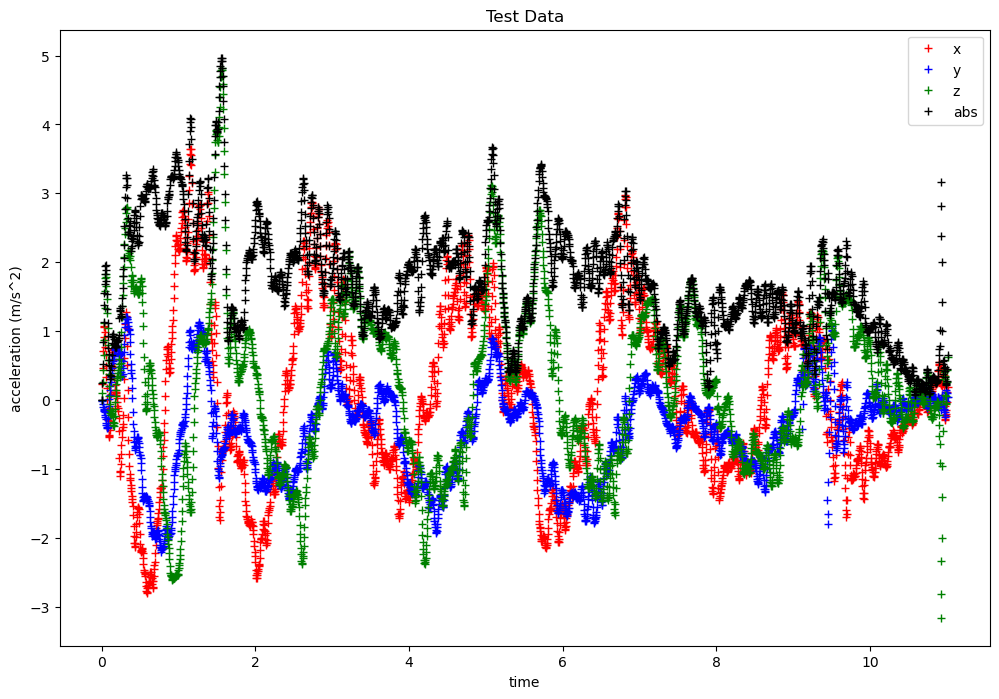

In [87]:
size = 10
mark = "+"
plt.figure(figsize=(12,8))
plt.title("Test Data")
plt.plot(data['time'], data['x'], "r+", label = 'x')
plt.plot(data['time'], data['y'], "b+", label = 'y')
plt.plot(data['time'], data['z'], "g+", label = 'z')
plt.plot(data['time'], data['abs'], "k+", label = 'abs')
plt.xlabel("time")
plt.ylabel("acceleration (m/s^2)")
plt.legend()
plt.show

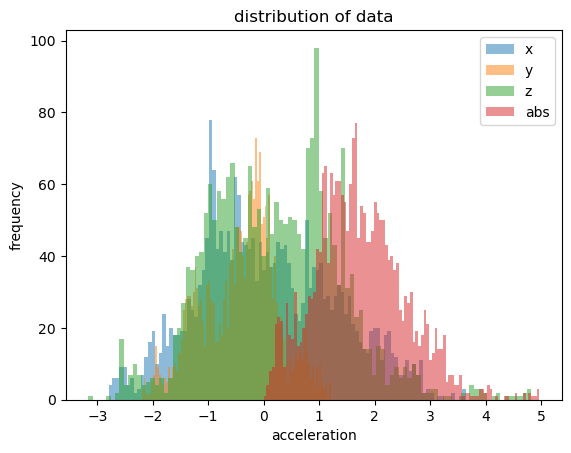

In [88]:
#distriutions

plt.figure()
plt.hist(data['x'], bins = 100, alpha=0.5, label='x')
plt.hist(data['y'], bins = 100, alpha=0.5, label='y')
plt.hist(data['z'], bins = 100, alpha=0.5, label='z')
plt.hist(data['abs'], bins = 100, alpha=0.5, label='abs')

plt.legend()
plt.title("distribution of data")
plt.xlabel("acceleration")
plt.ylabel("frequency")
plt.show()

### Smoothing data by aggregation


In [93]:
#set up timebins
timestart = data['time'][0]
timeend = data['time'][rows-1]

dt = 0.1

timebins = pd.DataFrame(np.arange(timestart, timeend, dt), columns = ['bin_start'])
timebins['bin_end'] = timebins['bin_start'].shift(-1)
timebins['bin_end'][len(timebins)-1] = timebins['bin_end'][len(timebins)-1] + 5
timebins.loc[len(timebins) -1, 'bin_end'] = timebins.loc[len(timebins) -2, 'bin_end'] + dt *100
timebins['bin_number'] = range(len(timebins))

timebins


,bin_start,bin_end,bin_number
0,0.003206,0.103206,0
1,0.103206,0.203206,1
2,0.203206,0.303206,2
3,0.303206,0.403206,3
4,0.403206,0.503206,4
...,...,...,...
106,10.603206,10.703206,106
107,10.703206,10.803206,107
108,10.803206,10.903206,108
109,10.903206,11.003206,109


In [94]:
def find_bin_number(timestamp, bins_df):
    bin_row = bins_df[(bins_df['bin_start'] <= timestamp) & (bins_df['bin_end'] > timestamp)]
    if not bin_row.empty:
        return bin_row.iloc[0]['bin_number']
    else:
        return np.nan  # if no bin is found (shouldn't happen if bins cover all timestamps)


In [95]:
#find bin numbers for data
data['bin_number'] = data['time'].apply(find_bin_number, bins_df=timebins)

In [96]:
# average over bins
aggregated_data = data.groupby('bin_number').agg('mean')

In [81]:
aggregated_data

,time,x,y,z,abs
bin_number,,,,,
0.0,0.050915,0.303575,-0.202253,0.915530,1.149459
1.0,0.151091,0.240573,0.549653,-0.109209,0.726034
2.0,0.251271,-0.358547,0.635541,1.071751,1.476985
3.0,0.351451,-0.322443,0.852016,2.221338,2.641003
4.0,0.451631,-1.817923,-0.596649,1.608783,2.506522
...,...,...,...,...,...
106.0,10.653292,0.001986,0.082539,0.103157,0.227757
107.0,10.751087,0.010704,0.011135,0.107821,0.241663
108.0,10.851267,0.278624,0.006424,-0.147562,0.334280


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 640x480 with 0 Axes>

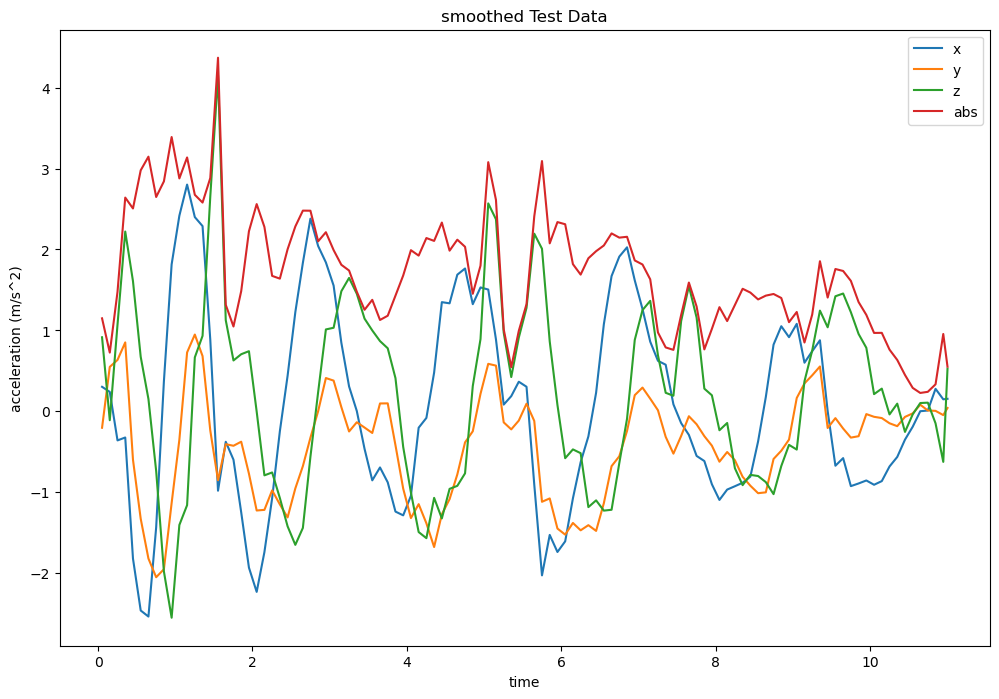

In [82]:
plt.figure()
size = 10
mark = "+"
plt.figure(figsize=(12,8))
plt.title("smoothed Test Data")
plt.plot(aggregated_data['time'], aggregated_data['x'], label = 'x')
plt.plot(aggregated_data['time'], aggregated_data['y'], label = 'y')
plt.plot(aggregated_data['time'], aggregated_data['z'], label = 'z')
plt.plot(aggregated_data['time'], aggregated_data['abs'], label = 'abs')
plt.xlabel("time")
plt.ylabel("acceleration (m/s^2)")
plt.legend()
plt.show

In [97]:
data

,time,x,y,z,abs,bin_number
0,0.003206,0.000000,0.000000,0.000000,0.000000,0.0
1,0.008071,0.227786,-0.016674,0.099801,0.249248,0.0
2,0.012747,0.458751,-0.049896,0.257033,0.528213,0.0
3,0.017517,0.718220,-0.102618,0.436018,0.846453,0.0
4,0.022288,0.917469,-0.131076,0.660093,1.137828,0.0
...,...,...,...,...,...,...
2303,10.989611,-0.207720,0.120852,-0.054945,0.246520,109.0
2304,10.994382,-0.146109,0.149413,0.065645,0.219046,109.0
2305,10.999152,-0.024265,0.099703,0.260825,0.280284,109.0
2306,11.003922,0.117745,0.045929,0.435184,0.453165,110.0


In [105]:
data_fft_x = np.fft.fft(data['x'])

c:\Users\tunde\ML4QS-group60\.venv\lib\site-packages\matplotlib\cbook\__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


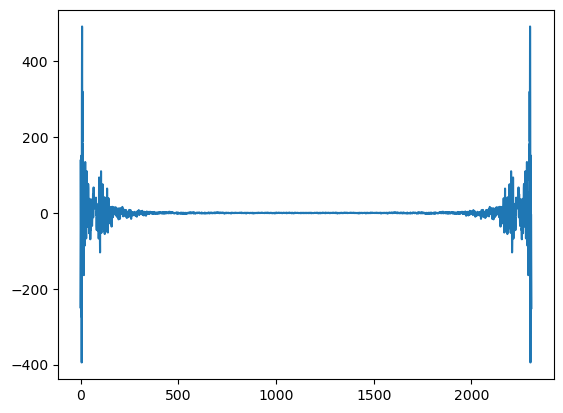

In [106]:
plt.plot(data_fft_x)

In [ ]:
data_fft_x

In [107]:
data_ifft_x = np.fft.ifft(data_fft_x)

c:\Users\tunde\ML4QS-group60\.venv\lib\site-packages\matplotlib\cbook\__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


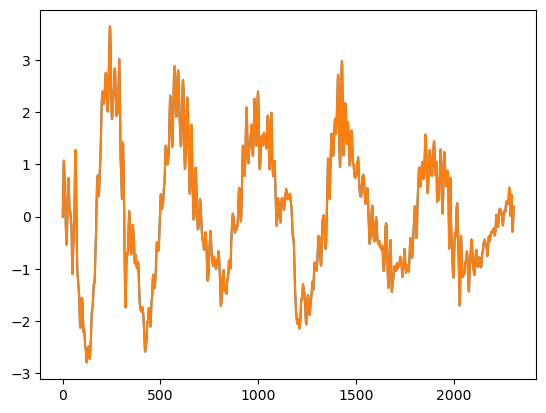

In [109]:
plt.plot(data_ifft_x, label="fft->ifft")
plt.plot(data['x'], label='og')